# Feature engineering, optimization model hyper-parameters with GridSearchCV & applying techniques like boosting, stacking and voting

= amélioration des scores des modèles de ML via du Feature engineering, optimization model hyper-parameters with GridSearchCV & applying techniques like boosting, stacking and voting

# Importations et fonctions

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# plotly library
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore")
#warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
#warnings.filterwarnings(action='once')

from subprocess import check_output
print(check_output(["ls",'/Users/jl/Downloads/input']).decode("utf8"))

gender_submission.csv
test.csv
train.csv



In [321]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [322]:
# fonctions utiles

def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_


def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

In [323]:
# chargement des données
df_train = pd.read_csv('/Users/jl/Downloads/train.csv')
df_test = pd.read_csv('/Users/jl/Downloads/test.csv')

# EDA

In [324]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [326]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [327]:
df_test.info()
# Il semble que la feature Cabine ait beaucoup de données manquantes, de même que certaines données concernant l'âge et l'embarquement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


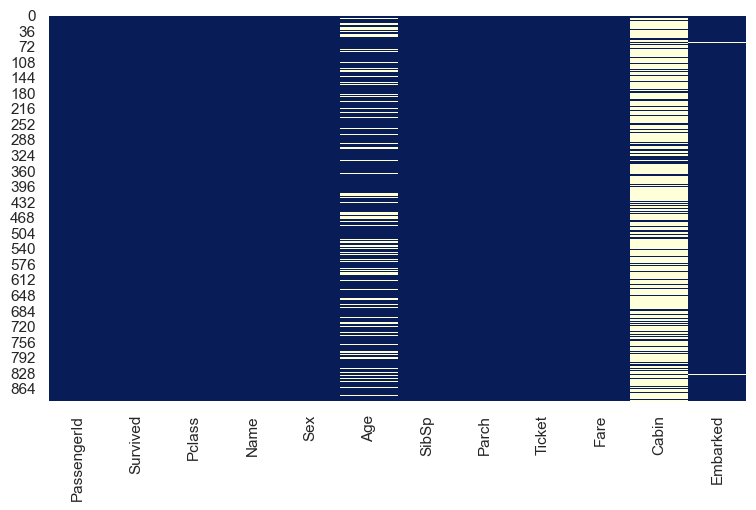

In [328]:
# Traçage Seaborn heatmaps de la matrice isnull pour les données de formation et de test
# données manquantes dans df_train et df_test

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

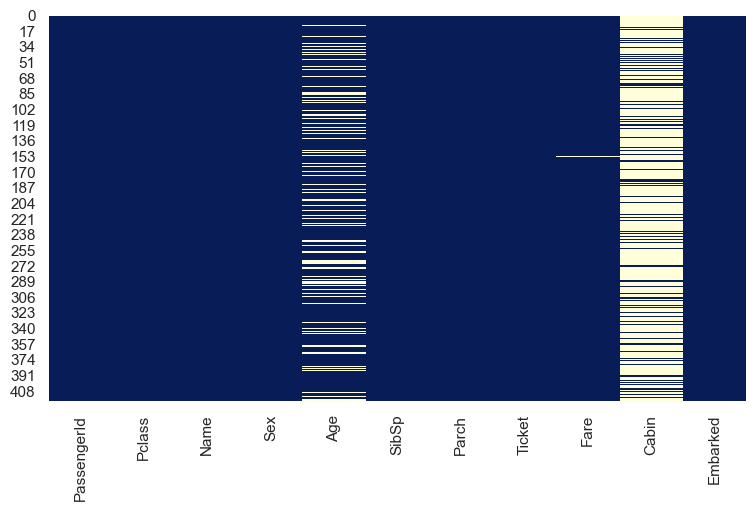

In [329]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_test.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

Seaborn Countplots

for all categorical columns

In [330]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

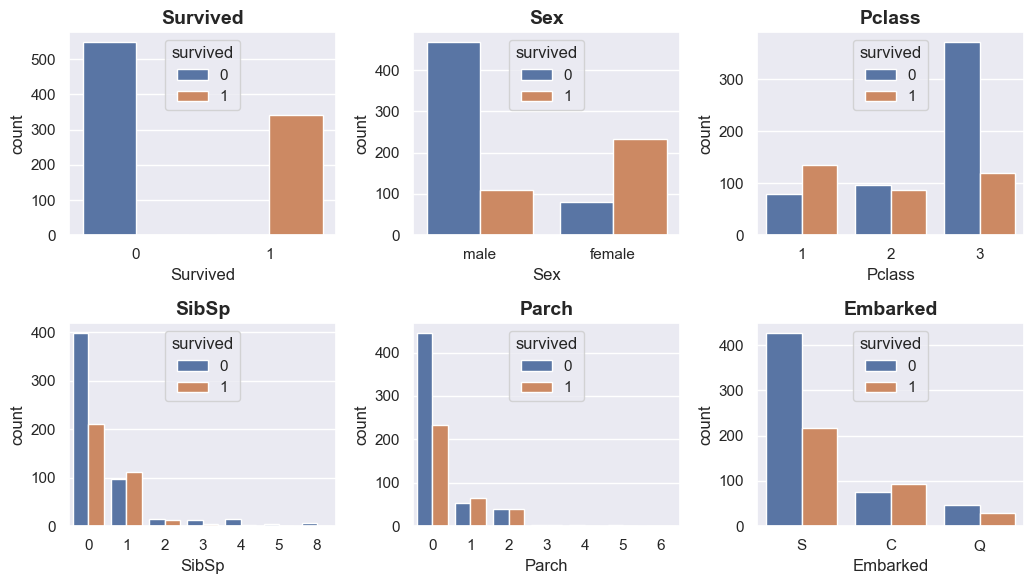

In [331]:
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
       
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(x=df_train[cols[i]], hue=df_train["Survived"], ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center') 
        
plt.tight_layout()  

Sur les 891 passagers du df_test, moins de 350 survivent.

Les femmes sont beaucoup plus nombreuses à survivre que les hommes.

De même, les chances de survie sont beaucoup plus élevées dans les classes 1 et 2 que dans la classe 3.

Le taux de survie des passagers voyageant avec SibSp ou Parch est plus élevé que celui des passagers voyageant seuls.

Les passagers embarqués en C et Q ont plus de chances de survie que ceux embarqués en S.

Distplots de Seaborn

Distribution de l'âge en fonction de la classe, du sexe et du nombre de survivants

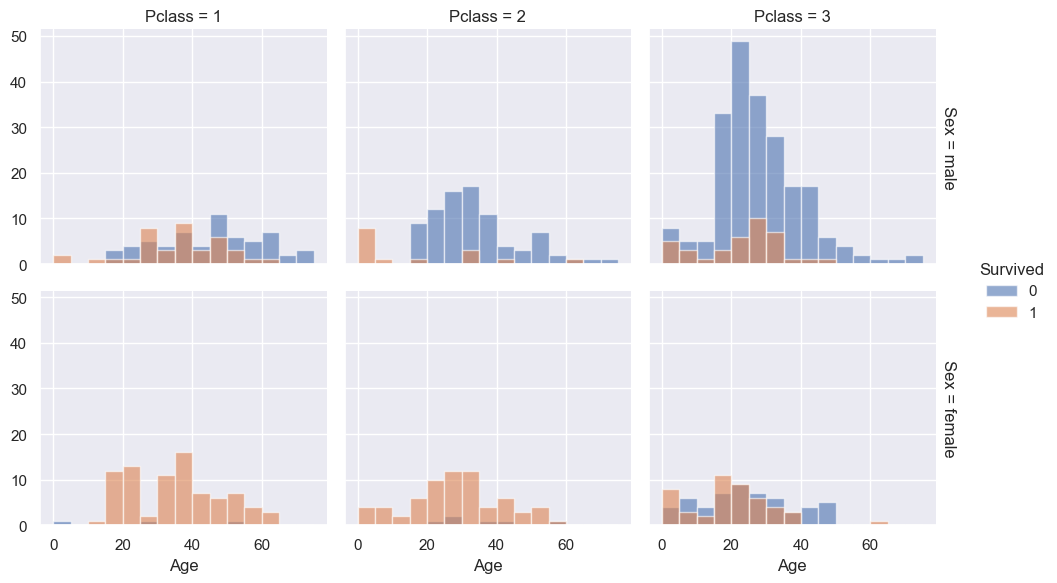

In [332]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

Les passagers masculins avaient le plus de chances de survivre s'ils appartenaient à la classe 1 ou s'ils étaient âgés de moins de 5 ans.

Le taux de survie le plus bas pour les passagères se situait dans la classe 3 et elles étaient âgées de plus de 40 ans.

La plupart des passagers étaient des hommes, de la classe 3 et âgés de 15 à 35 ans.

In [333]:
# Répartition du Fare en fonction de la classe P, du sexe et du nombre de survivants

df_train['Fare'].max()

512.3292

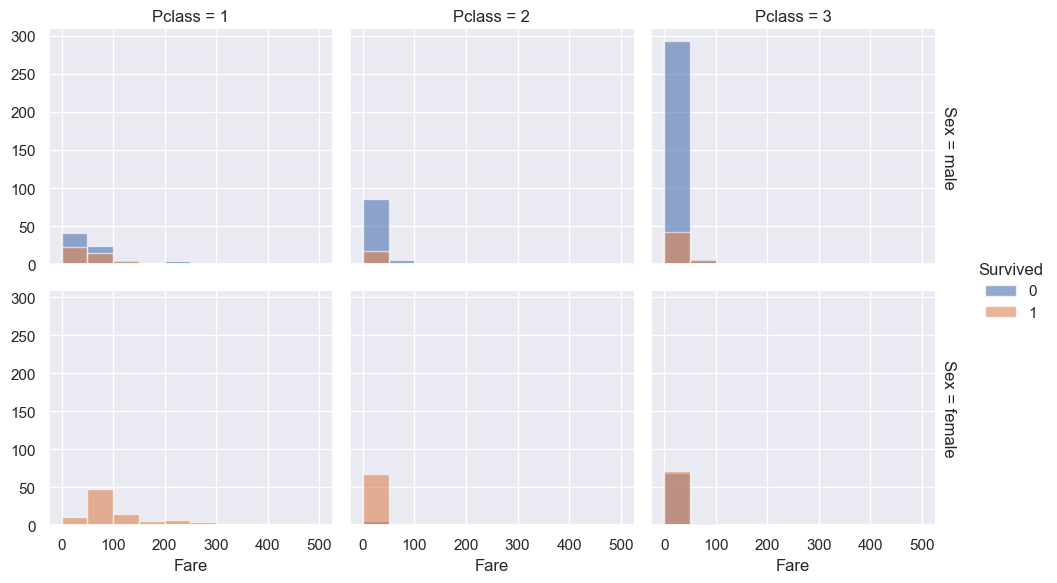

In [334]:
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

Bar and Box plots

Le mode par défaut des diagrammes à barres de seaborn est de représenter la valeur moyenne de la catégorie.

L'écart-type est également indiqué.

Ainsi, si nous choisissons Survivant comme valeur y, nous obtenons un graphique du taux de survie en fonction des catégories présentes dans l'élément choisi comme valeur x

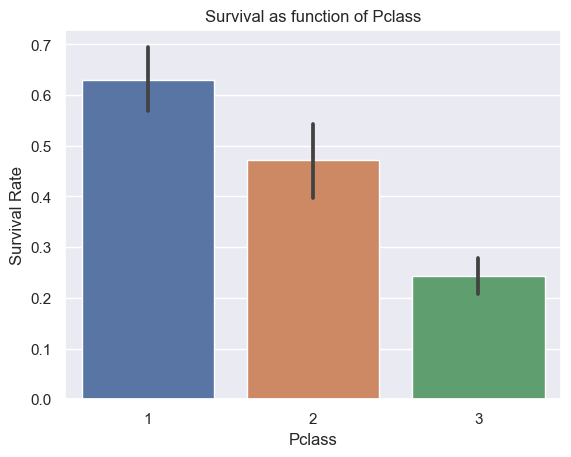

In [335]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

Le taux de survie diminue avec la classe P

Le paramètre de teinte nous permet de voir la différence entre le taux de survie des hommes et celui des femmes.

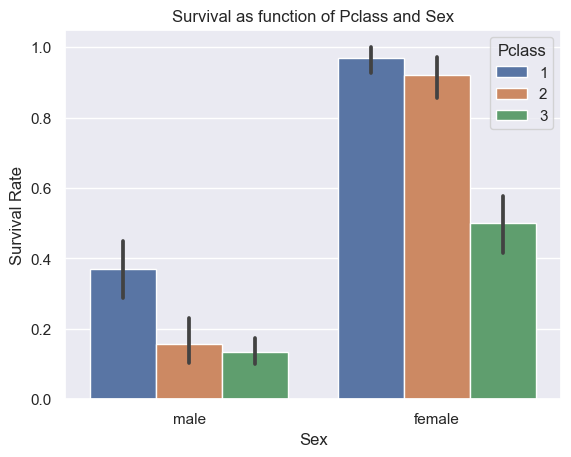

In [336]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

Taux de survie le plus élevé (>0,9) pour les femmes de la classe 1 ou 2.

Taux de survie le plus bas (<0,2) pour les hommes de la classe 3.

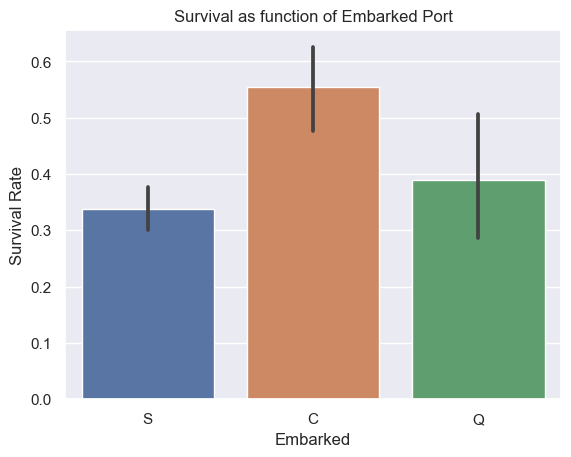

In [337]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

Les passagers embarqués en "S" ont le taux de survie le plus bas, ceux embarqués en "C" le plus élevé.

De nouveau, avec la teinte, nous voyons le taux de survie en fonction de l'embarquement et de la classe de passagers.

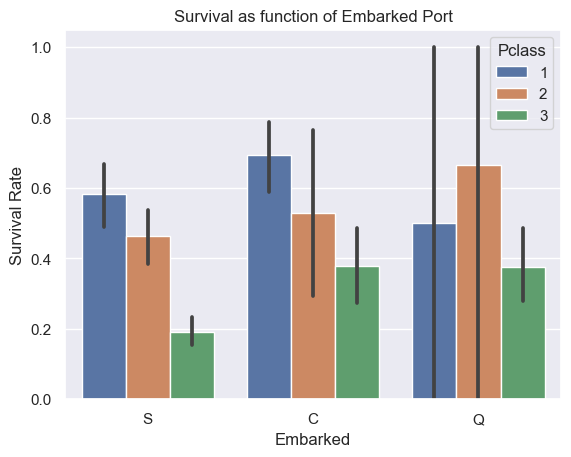

In [338]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

Mais le taux de survie seul n'est pas bon car son incertitude dépend du nombre d'échantillons.

Nous devons également tenir compte du nombre total de passagers qui ont embarqué.

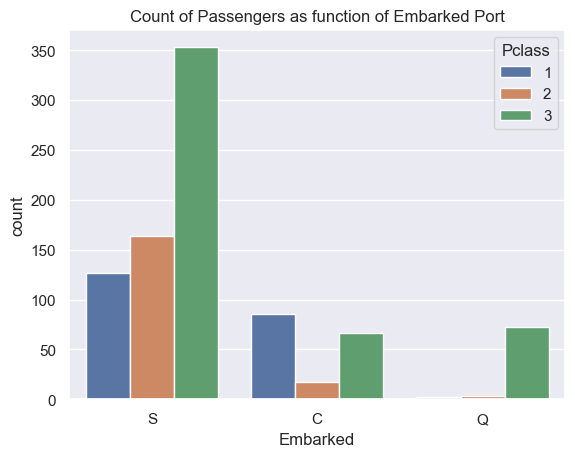

In [339]:
sns.countplot(x='Embarked', hue='Pclass', data=df_train)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

Les passagers embarqués en C avaient la plus grande proportion de billets de classe 1.

Presque tous les passagers embarqués en "Q" avaient des billets de classe 3.

Pour chaque classe, le plus grand nombre de passagers a embarqué en "S".

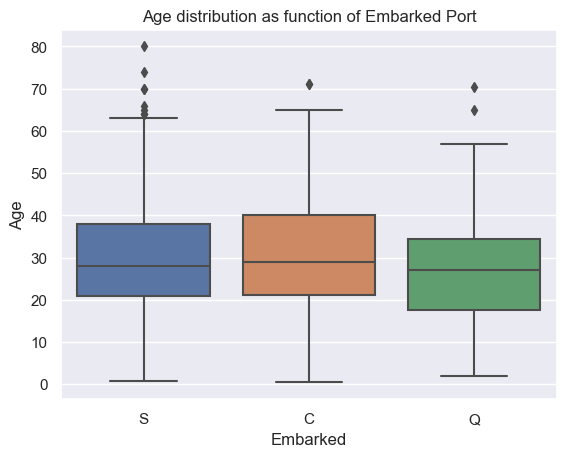

In [340]:
# Boxplot
sns.boxplot(x='Embarked', y='Age', data=df_train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

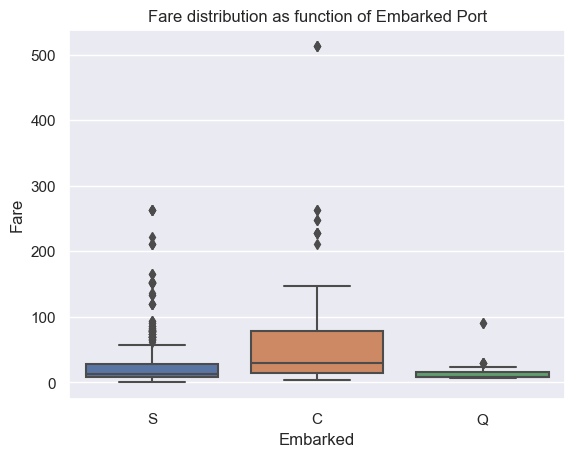

In [341]:
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

Le tarif moyen des passagers embarqués en C était plus élevé

Diagrammes en essaim et diagrammes en violon

Bien que les diagrammes en essaim et les diagrammes en violon suivants montrent les mêmes données que les diagrammes de comptage ou les diagrammes de distorsion précédents, ils peuvent révéler certains détails qui disparaissent dans d'autres diagrammes

Cependant, il faut plus de temps pour étudier ces graphiques en détail.

In [342]:
cm_surv = ["darkgrey" , "lightgreen"]

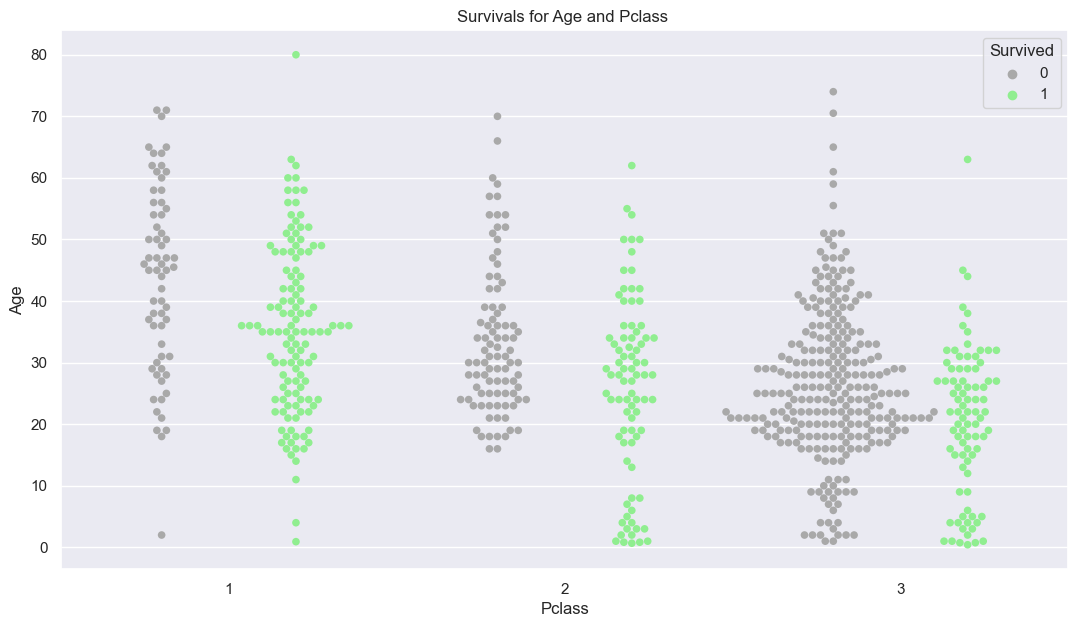

In [343]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True, data=df_train , palette=cm_surv, size=5.5, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

Ici, le taux de survie élevé des enfants de la classe 2 est facilement observable.

Il devient également plus évident que pour les passagers âgés de plus de 40 ans, les meilleures chances de survie se situent dans la classe 1, et la plus petite chance dans la classe 3

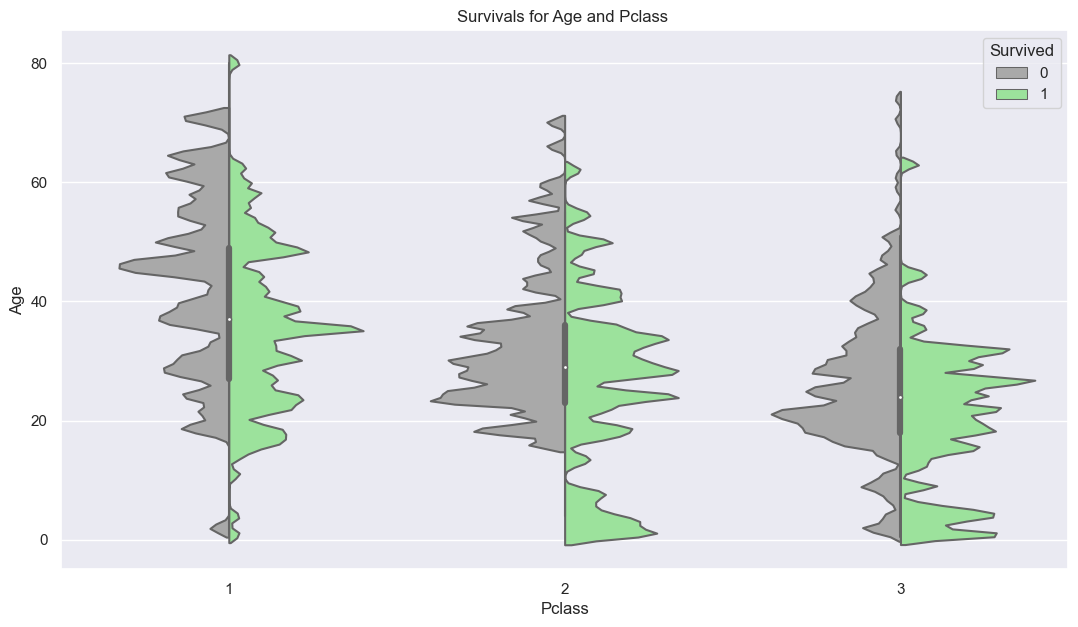

In [344]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df_train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

# Part 2: Data Wrangling and Feature Engineering

# Feature Engineering

New Features: 'FamilySize' , 'Alone' , 'NameLen' and 'Title'

In [345]:
for df in [df_train, df_test] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] +1
    
    df['Alone']=0
    df.loc[(df.FamilySize==1),'Alone'] = 1
    
    df['NameLen'] = df.Name.apply(lambda x : len(x)) 
    df['NameLenBin']=np.nan
    for i in range(20,0,-1):
        df.loc[ df['NameLen'] <= i*5, 'NameLenBin'] = i
    
    
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

New Feature: NameLenBin

In [346]:
print(df_train[['NameLen' , 'NameLenBin']].head(10))

   NameLen  NameLenBin
0       23         5.0
1       51        11.0
2       22         5.0
3       44         9.0
4       24         5.0
5       16         4.0
6       23         5.0
7       30         6.0
8       49        10.0
9       35         7.0


In [347]:
grps_namelenbin_survrate = df_train.groupby(['NameLenBin'])['Survived'].mean().to_frame()
grps_namelenbin_survrate

,Survived
NameLenBin,
3.0,0.227273
4.0,0.230769
5.0,0.325581
6.0,0.364929
7.0,0.522727
8.0,0.477273
9.0,0.800000
10.0,0.800000
11.0,0.812500


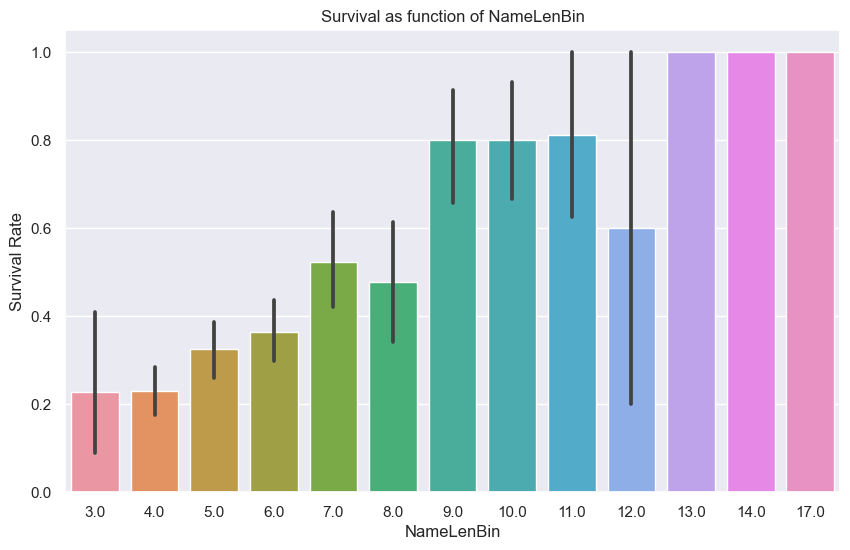

In [348]:
plt.subplots(figsize=(10,6))
sns.barplot(x='NameLenBin' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()

Il semble qu'il y ait une très forte corrélation entre le taux de survie et la longueur du nom.

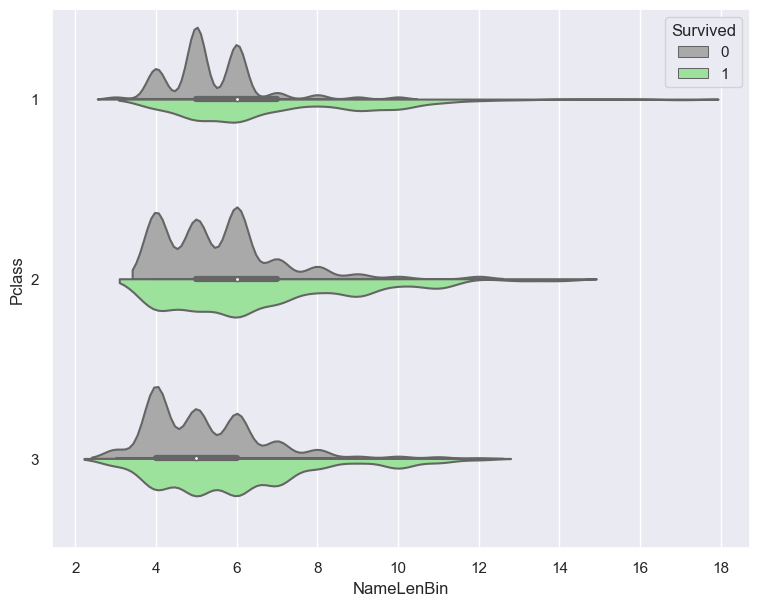

In [349]:
fig, ax = plt.subplots(figsize=(9,7))
sns.violinplot(x="NameLenBin", y="Pclass", data=df_train, hue='Survived', split=True, 
               orient="h", bw=0.2 , palette=cm_surv, ax=ax)
plt.show()

New Feature: Title

In [350]:
grps_title_survrate = df_train.groupby(['Title'])['Survived'].mean().to_frame()
grps_title_survrate

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


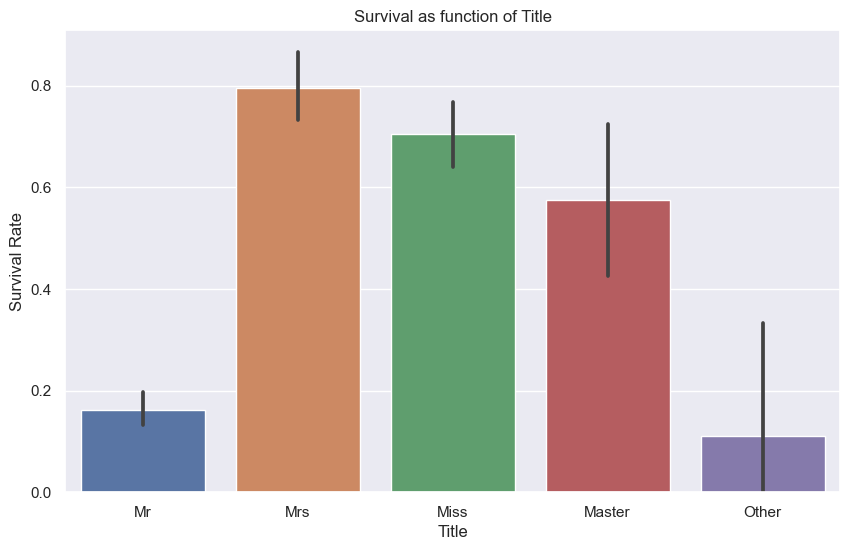

In [351]:
plt.subplots(figsize=(10,6))
sns.barplot(x='Title' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Title")
plt.show()

New Feature: Family size

In [352]:
pd.crosstab(df_train.FamilySize,df_train.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

Survived,0,1
FamilySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,0.000000
11,1.000000,0.000000


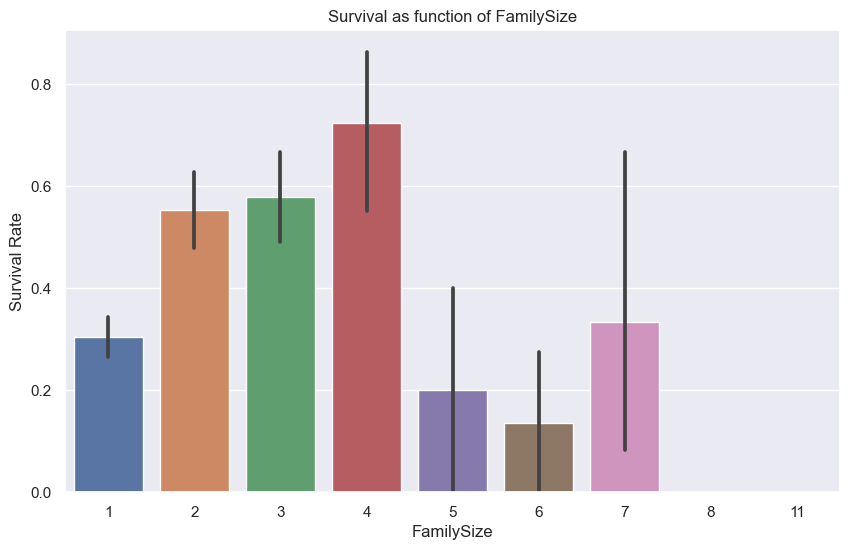

In [353]:
plt.subplots(figsize=(10,6))
sns.barplot(x='FamilySize' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of FamilySize")
plt.show()

# Data Wrangling

Remplir NaN avec la moyenne ou le mode

In [354]:
for df in [df_train, df_test]:

    # Title
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])

    # Age: use Title to fill missing values
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
    df = df.drop('Name', axis=1)

In [355]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode().iloc[0])

# Fare
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

En combinant l'âge et le tarif, convertir le titre en chiffres

In [356]:
for df in [df_train, df_test]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        
    
    # convert Title to numerical
    df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
    # fill na with maximum frequency mode
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
    df['Title'] = df['Title'].astype(int)  

In [357]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

passenger_id = df_test_ml['PassengerId']

double vérification des valeurs manquantes

In [358]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
 14  NameLen      891 non-null    int64  
 15  NameLenBin   891 non-null    float64
 16  Title        891 non-null    int64  
 17  Age_bin      891 non-null    float64
 18  Fare_bin     891 non-null    float64
dtypes: float

In [359]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
 12  Alone        418 non-null    int64  
 13  NameLen      418 non-null    int64  
 14  NameLenBin   418 non-null    float64
 15  Title        418 non-null    int64  
 16  Age_bin      418 non-null    float64
 17  Fare_bin     418 non-null    float64
dtypes: float64(5), int64(8), object(5)
memory usage: 5

convertir les données catégorielles en données numériques : get_dummies

In [360]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)

#df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)
#df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age_bin', 'Fare_bin'],axis=1,inplace=True)

In [361]:
df_train_ml.dropna(inplace=True)

In [362]:
for df in [df_train_ml, df_test_ml]:
    df.drop(['NameLen'], axis=1, inplace=True)

    df.drop(['SibSp'], axis=1, inplace=True)
    df.drop(['Parch'], axis=1, inplace=True)
    df.drop(['Alone'], axis=1, inplace=True)

In [363]:
df_train_ml.head()

,Survived,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,7.2500,2,5.0,1,3.0,1,0,1,0,1
1,1,71.2833,2,11.0,4,4.0,0,0,0,0,0
2,1,7.9250,1,5.0,3,3.0,0,0,1,0,1
3,1,53.1000,2,9.0,4,4.0,0,0,1,0,0
4,0,8.0500,1,5.0,1,4.0,1,0,1,0,1


In [364]:
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
df_test_ml.head()

,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,7.8292,1,4.0,1,4.0,1,1,0,0,1
1,7.0000,2,7.0,4,5.0,0,0,1,0,1
2,9.6875,1,5.0,1,7.0,1,1,0,1,0
3,8.6625,1,4.0,1,3.0,1,0,1,0,1
4,12.2875,3,9.0,4,3.0,0,0,1,0,1


Standard Scaler

In [365]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop(['Survived'],axis=1))
scaled_features = scaler.transform(df_train_ml.drop(['Survived'],axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
#scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

In [366]:
df_train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.502445,0.059160,-0.422786,-0.744033,-0.363116,0.737695,-0.307562,0.615838,-0.510152,0.902587
1,0.786845,0.059160,2.751669,1.792701,0.385810,-1.355574,-0.307562,-1.623803,-0.510152,-1.107926
2,-0.488854,-0.560975,-0.422786,0.947123,-0.363116,-1.355574,-0.307562,0.615838,-0.510152,0.902587
3,0.420730,0.059160,1.693517,1.792701,0.385810,-1.355574,-0.307562,0.615838,-0.510152,-1.107926
4,-0.486337,-0.560975,-0.422786,-0.744033,0.385810,0.737695,-0.307562,0.615838,-0.510152,0.902587


In [367]:
df_test_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.490783,-0.560975,-0.951861,-0.744033,0.385810,0.737695,3.251373,-1.623803,-0.510152,0.902587
1,-0.507479,0.059160,0.635366,1.792701,1.134737,-1.355574,-0.307562,0.615838,-0.510152,0.902587
2,-0.453367,-0.560975,-0.422786,-0.744033,2.632589,0.737695,3.251373,-1.623803,1.960202,-1.107926
3,-0.474005,-0.560975,-0.951861,-0.744033,-0.363116,0.737695,-0.307562,0.615838,-0.510152,0.902587
4,-0.401017,0.679295,1.693517,1.792701,-0.363116,-1.355574,-0.307562,0.615838,-0.510152,0.902587


In [368]:
df_train_ml.head()

,Survived,Fare,FamilySize,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,7.2500,2,5.0,1,3.0,1,0,1,0,1
1,1,71.2833,2,11.0,4,4.0,0,0,0,0,0
2,1,7.9250,1,5.0,3,3.0,0,0,1,0,1
3,1,53.1000,2,9.0,4,4.0,0,0,1,0,0
4,0,8.0500,1,5.0,1,4.0,1,0,1,0,1


In [369]:
X = df_train_ml.drop('Survived', axis=1)
y = df_train_ml['Survived']
X_test = df_test_ml

X_sc = df_train_ml_sc
y_sc = df_train_ml['Survived']
X_test_sc = df_test_ml_sc

# Part 3: Optimization of Classifier parameters, Boosting, Voting and Stacking

In [370]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


from sklearn.metrics import accuracy_score

rappel : k fold cross validation

In [371]:
from sklearn.model_selection import cross_val_score

SVC, features not scaled

Support Vector Machine Classifier

In [372]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.81111111 0.79775281 0.7752809  0.7752809  0.82022472 0.82022472
 0.85393258 0.78651685 0.85393258 0.84269663]
0.8136953807740325


SVC, features scaled

In [373]:
svc = SVC(gamma = 0.01, C = 100)
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.82222222 0.84269663 0.78651685 0.86516854 0.83146067 0.82022472
 0.80898876 0.76404494 0.86516854 0.86516854]
0.8271660424469414


RFC, features not scaled

In [374]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.83333333 0.88764045 0.76404494 0.86516854 0.85393258 0.78651685
 0.82022472 0.76404494 0.88764045 0.80898876]
0.8271535580524343


# Hyperparameter tuning with RandomizedSearchCV and GridSearchCV (Réglage des hyperparamètres avec RandomizedSearchCV et GridSearchCV)

RandomizedSearchCV et GridSearchCV appliquent la validation croisée k fold sur un ensemble choisi de paramètres et trouvent ensuite les paramètres qui donnent les meilleures performances.

Pour GridSearchCV, toutes les combinaisons possibles des valeurs des paramètres spécifiés sont testées, ce qui permet d'obtenir une grille de paramètres.

Pour RandomizedSearchCV, un nombre fixe de paramètres est échantillonné à partir des distributions spécifiées. Le nombre de paramètres essayés est donné par n_iter.

In [375]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

Je vais appliquer GridSearchCV et RandomizedSearchCV pour ces modèles de classification :
KNN, Arbre de décision, Random Forest, SVC

# SVC : RandomizedSearchCV

In [376]:
model = SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
rand_SVC = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
rand_SVC.fit(X_sc,y_sc)
score_rand_SVC = get_best_score(rand_SVC)

0.8013809553700334
{'C': 4643.467433692215, 'gamma': 0.019871901264252766}
SVC(C=4643.467433692215, gamma=0.019871901264252766)


# SVC : GridSearchCV

In [377]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X_sc,y_sc)
sc_svc = get_best_score(svc_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
0.8338951310861423
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [378]:
# submission for svc

pred_all_svc = svc_grid.predict(X_test_sc)

sub_svc = pd.DataFrame()
sub_svc['PassengerId'] = df_test['PassengerId']
sub_svc['Survived'] = pred_all_svc
sub_svc.to_csv('svc.csv',index=False)

# KNN

In [379]:
knn = KNeighborsClassifier()
leaf_range = list(range(3, 15, 1))
k_range = list(range(1, 15, 1))
weight_options = ['uniform', 'distance']
param_grid = dict(leaf_size=leaf_range, n_neighbors=k_range, weights=weight_options)
print(param_grid)

knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X, y)

sc_knn = get_best_score(knn_grid)

{'leaf_size': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance']}
Fitting 10 folds for each of 336 candidates, totalling 3360 fits
0.7991635455680399
{'leaf_size': 3, 'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(leaf_size=3, n_neighbors=9, weights='distance')


In [380]:
# submission for knn
pred_all_knn = knn_grid.predict(X_test)

sub_knn = pd.DataFrame()
sub_knn['PassengerId'] = df_test['PassengerId']
sub_knn['Survived'] = pred_all_knn
sub_knn.to_csv('knn.csv',index=False)

# Decision Tree

In [381]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split': [4,7,10,12]}
dtree_grid = GridSearchCV(dtree, param_grid, cv=10, refit=True, verbose=1)
dtree_grid.fit(X_sc,y_sc)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8025842696629214
{'min_samples_split': 10}
DecisionTreeClassifier(min_samples_split=10)


In [382]:
# submission for decision tree
pred_all_dtree = dtree_grid.predict(X_test_sc)

sub_dtree = pd.DataFrame()
sub_dtree['PassengerId'] = df_test['PassengerId']
sub_dtree['Survived'] = pred_all_dtree
sub_dtree.to_csv('dtree.csv',index=False)

# Random Forest

In [383]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_sc,y_sc)
sc_rf = get_best_score(rf_grid)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.8485268414481897
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 8}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=8)


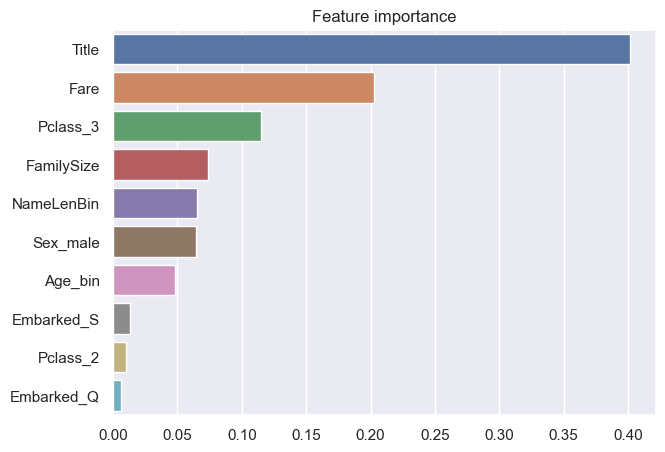

In [384]:
plot_feature_importances(rf_grid, X.columns)

In [385]:
# submission for random forest
pred_all_rf = rf_grid.predict(X_test_sc)

sub_rf = pd.DataFrame()
sub_rf['PassengerId'] = df_test['PassengerId']
sub_rf['Survived'] = pred_all_rf
sub_rf.to_csv('rf.csv',index=False)

# ExtraTreesClassifier

In [386]:
from sklearn.ensemble import ExtraTreesClassifier
extr = ExtraTreesClassifier()

param_grid = {'max_depth': [6,7,8,9], 'max_features': [7,8,9,10],  
              'n_estimators': [50, 100, 200]}

extr_grid = GridSearchCV(extr, param_grid, cv=10, refit=True, verbose=1)
extr_grid.fit(X_sc,y_sc)
sc_extr = get_best_score(extr_grid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
0.836167290886392
{'max_depth': 8, 'max_features': 8, 'n_estimators': 50}
ExtraTreesClassifier(max_depth=8, max_features=8, n_estimators=50)


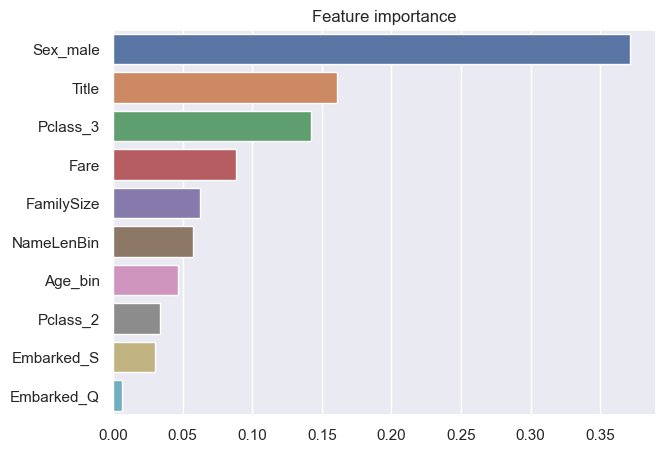

In [387]:
plot_feature_importances(extr_grid, X.columns)

In [388]:
# submission for ExtraTreesClassifier
pred_all_extr = extr_grid.predict(X_test_sc)

sub_extr = pd.DataFrame()
sub_extr['PassengerId'] = df_test['PassengerId']
sub_extr['Survived'] = pred_all_extr
sub_extr.to_csv('extr.csv',index=False)

# Gradient Boost Decision Tree GBDT

In [389]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [50, 100], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}
gbc_grid = GridSearchCV(gbc, param_grid, cv=10, refit=True, verbose=1)
gbc_grid.fit(X_sc,y_sc)
sc_gbc = get_best_score(gbc_grid)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8417852684144819
{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}
GradientBoostingClassifier(max_depth=4, min_samples_split=5)


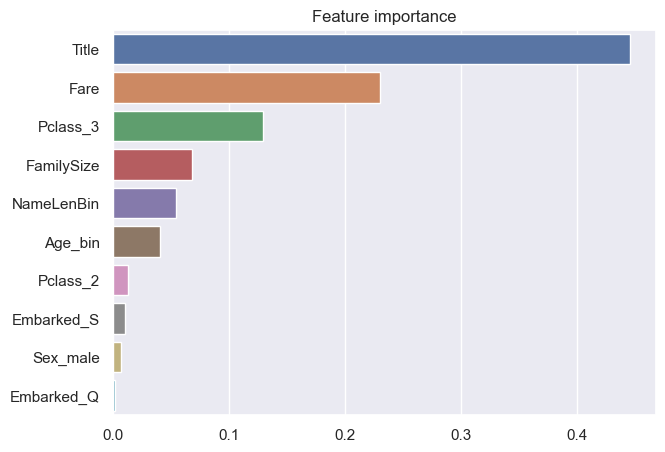

In [390]:
plot_feature_importances(gbc_grid, X.columns)

In [391]:
# submission for GradientBoostingClassifier
pred_all_gbc = gbc_grid.predict(X_test_sc)

sub_gbc = pd.DataFrame()
sub_gbc['PassengerId'] = df_test['PassengerId']
sub_gbc['Survived'] = pred_all_gbc
sub_gbc.to_csv('gbc.csv',index=False)

# eXtreme Gradient Boosting - XGBoost

In [392]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid = {'max_depth': [5,6,7,8], 'gamma': [1, 2, 4], 'learning_rate': [0.1, 0.2, 0.3, 0.5]}

with ignore_warnings(category=DeprecationWarning):
    xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
    xgb_grid.fit(X_sc,y_sc)
    sc_xgb = get_best_score(xgb_grid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
0.8474032459425718
{'gamma': 1, 'learning_rate': 0.3, 'max_depth': 8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


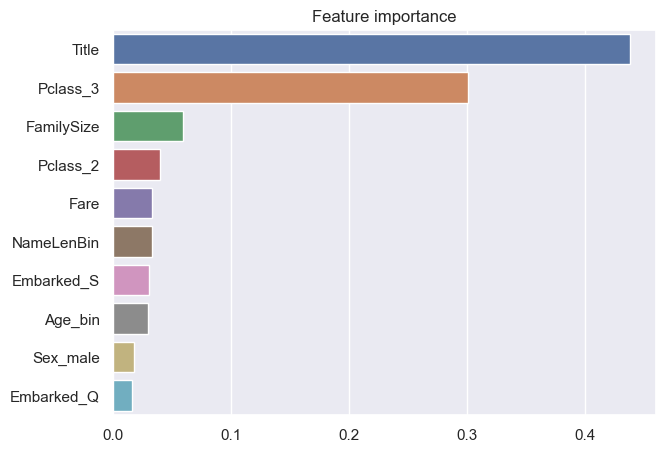

In [393]:
plot_feature_importances(xgb_grid, X.columns)

In [394]:
with ignore_warnings(category=DeprecationWarning):
    pred_all_xgb = xgb_grid.predict(X_test_sc)

sub_xgb = pd.DataFrame()
sub_xgb['PassengerId'] = df_test['PassengerId']
sub_xgb['Survived'] = pred_all_xgb
sub_xgb.to_csv('xgb.csv',index=False)

# Ada Boost

In [395]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 0.2]}
ada_grid = GridSearchCV(ada, param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_sc,y_sc)
sc_ada = get_best_score(ada_grid)

pred_all_ada = ada_grid.predict(X_test_sc)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.8327715355805243
{'learning_rate': 0.1, 'n_estimators': 30}
AdaBoostClassifier(learning_rate=0.1, n_estimators=30)


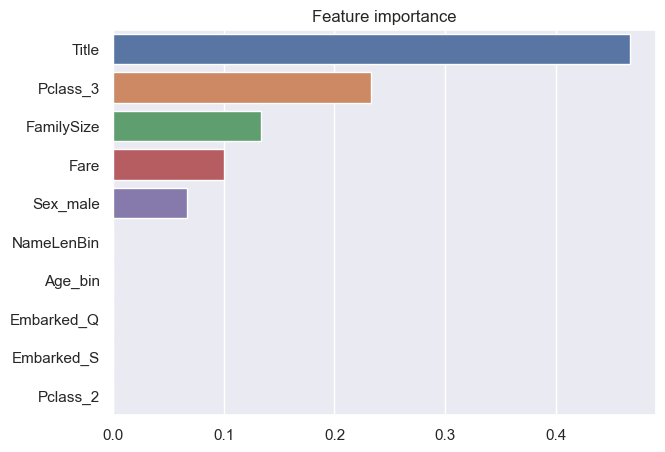

In [396]:
plot_feature_importances(ada_grid, X.columns)

In [397]:
sub_ada = pd.DataFrame()
sub_ada['PassengerId'] = df_test['PassengerId']
sub_ada['Survived'] = pred_all_ada
sub_ada.to_csv('ada.csv',index=False)

# CatBoost

Bibliothèque pour le renforcement du gradient sur les arbres de décision avec support de caractéristiques catégorielles

In [398]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()

param_grid = {'iterations': [100, 150], 'learning_rate': [0.3, 0.4, 0.5], 'loss_function' : ['Logloss']}

cat_grid = GridSearchCV(cat, param_grid, cv=10, refit=True, verbose=1)
cat_grid.fit(X_sc,y_sc, verbose=False)
sc_cat = get_best_score(cat_grid)

pred_all_cat = cat_grid.predict(X_test_sc)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
0.8395505617977527
{'iterations': 100, 'learning_rate': 0.3, 'loss_function': 'Logloss'}


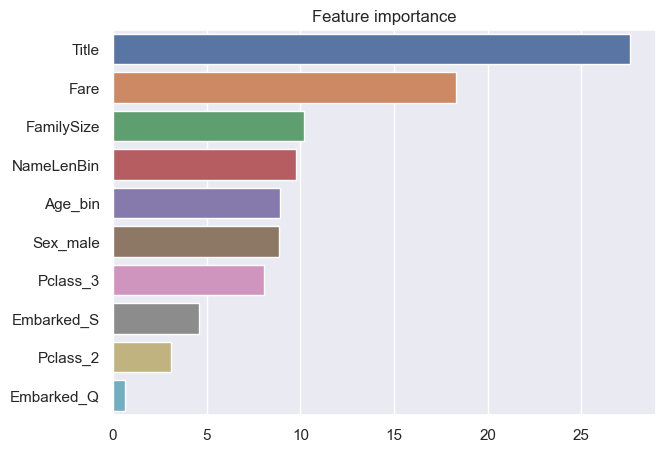

In [399]:
plot_feature_importances(cat_grid, X.columns)

In [400]:
sub_cat = pd.DataFrame()
sub_cat['PassengerId'] = df_test['PassengerId']
sub_cat['Survived'] = pred_all_cat
sub_cat['Survived'] = sub_cat['Survived'].astype(int)
sub_cat.to_csv('cat.csv',index=False)

# VotingClassifier

# First Voting

pour le premier ensemble de vote, j'utilise trois modèles simples (LR, RF, GNB)

In [401]:
from sklearn.ensemble import VotingClassifier

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

with ignore_warnings(category=DeprecationWarning):
    votingclf_grid = GridSearchCV(estimator=eclf, param_grid=params, cv=10)
    votingclf_grid.fit(X_sc,y_sc)
    sc_vot1 = get_best_score(votingclf_grid)

0.8226966292134831
{'lr__C': 1.0, 'rf__n_estimators': 200}
VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 voting='soft')


# Second Voting

pour le deuxième ensemble de vote, j'utilise les trois modèles (avec les paramètres optimaux trouvés par GridSearchCV) qui ont obtenu le meilleur score de test sur la base des validations croisées ci-dessus.

In [403]:
clf4 = GradientBoostingClassifier()
clf5 = SVC()
clf6 = RandomForestClassifier()

eclf_2 = VotingClassifier(estimators=[('gbdt', clf4), 
                                      ('svc', clf5), 
                                      ('rf', clf6)], voting='soft')

params = {'gbdt__n_estimators': [50], 'gbdt__min_samples_split': [3],
          'svc__C': [10, 100] , 'svc__gamma': [0.1,0.01,0.001] , 'svc__kernel': ['rbf'] , 'svc__probability': [True],  
          'rf__max_depth': [7], 'rf__max_features': [2,3], 'rf__min_samples_split': [3] } 

with ignore_warnings(category=DeprecationWarning):
    votingclf_grid_2 = GridSearchCV(estimator=eclf_2, param_grid=params, cv=10)
    votingclf_grid_2.fit(X_sc,y_sc)
    sc_vot2_cv = get_best_score(votingclf_grid_2)

0.8327715355805243
{'gbdt__min_samples_split': 3, 'gbdt__n_estimators': 50, 'rf__max_depth': 7, 'rf__max_features': 2, 'rf__min_samples_split': 3, 'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'rbf', 'svc__probability': True}
VotingClassifier(estimators=[('gbdt',
                              GradientBoostingClassifier(min_samples_split=3,
                                                         n_estimators=50)),
                             ('svc', SVC(C=100, gamma=0.001, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=2,
                                                     min_samples_split=3))],
                 voting='soft')


In [404]:
with ignore_warnings(category=DeprecationWarning):    
    pred_all_vot2 = votingclf_grid_2.predict(X_test_sc)

sub_vot2 = pd.DataFrame()
sub_vot2['PassengerId'] = df_test['PassengerId']
sub_vot2['Survived'] = pred_all_vot2
sub_vot2.to_csv('vot2.csv',index=False)

# StackingClassifier

In [405]:
from mlxtend.classifier import StackingClassifier

In [406]:
# Initialisation des modèles
clf1 = xgb_grid.best_estimator_
clf2 = gbc_grid.best_estimator_
clf3 = rf_grid.best_estimator_
clf4 = svc_grid.best_estimator_

lr = LogisticRegression()
st_clf = StackingClassifier(classifiers=[clf1, clf1, clf2, clf3, clf4], meta_classifier=lr)

params = {'meta_classifier__C': [0.1,1.0,5.0,10.0] ,
          #'use_probas': [True] ,
          #'average_probas': [True] ,
          'use_features_in_secondary' : [True, False]
         }
with ignore_warnings(category=DeprecationWarning):
    st_clf_grid = GridSearchCV(estimator=st_clf, param_grid=params, cv=5, refit=True)
    st_clf_grid.fit(X_sc, y_sc)
    sc_st_clf = get_best_score(st_clf_grid)

0.8451195781809051
{'meta_classifier__C': 10.0, 'use_features_in_secondary': True}
StackingClassifier(classifiers=[XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=1,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.3,

In [407]:
with ignore_warnings(category=DeprecationWarning):    
    pred_all_stack = st_clf_grid.predict(X_test_sc)

sub_stack = pd.DataFrame()
sub_stack['PassengerId'] = df_test['PassengerId']
sub_stack['Survived'] = pred_all_stack
sub_stack.to_csv('stack_clf.csv',index=False)

# Comparison plot for best models

# scores from GridSearchCV

In [408]:
list_scores = [sc_knn, sc_rf, sc_extr, sc_svc, sc_gbc, sc_xgb, 
               sc_ada, sc_cat, sc_vot2_cv, sc_st_clf]

list_classifiers = ['KNN','RF','EXTR','SVC','GBC','XGB',
                    'ADA','CAT','VOT2','STACK']

submission scores

In [409]:
score_subm_svc   = 0.80861
score_subm_vot2  = 0.78947
score_subm_ada   = 0.78468
score_subm_rf    = 0.77990
score_subm_xgb   = 0.77033
score_subm_dtree = 0.76076
score_subm_extr  = 0.76076
score_subm_gbc  = 0.74641
score_subm_cat   = 0.74162
score_subm_knn   = 0.69856

score_subm_stack = 0.76076

In [410]:
subm_scores = [score_subm_knn, score_subm_rf, score_subm_extr, score_subm_svc, 
               score_subm_gbc, score_subm_xgb, score_subm_ada, score_subm_cat, 
               score_subm_vot2, score_subm_stack]

In [411]:
trace1 = go.Scatter(x = list_classifiers, y = list_scores,
                   name="Validation", text = list_classifiers)
trace2 = go.Scatter(x = list_classifiers, y = subm_scores,
                   name="Submission", text = list_classifiers)

data = [trace1, trace2]

layout = dict(title = "Validation and Submission Scores", 
              xaxis=dict(ticklen=10, zeroline= False),
              yaxis=dict(title = "Accuracy", side='left', ticklen=10,),                                  
              legend=dict(orientation="v", x=1.05, y=1.0),
              autosize=False, width=750, height=500,
              )

fig = dict(data = data, layout = layout)
iplot(fig)

Corrélation des résultats de la prédiction

In [412]:
predictions = {'KNN': pred_all_knn, 'RF': pred_all_rf, 'EXTR': pred_all_extr, 
               'SVC': pred_all_svc, 'GBC': pred_all_gbc, 'XGB': pred_all_xgb, 
               'ADA': pred_all_ada, 'CAT': pred_all_cat, 'STACK': pred_all_stack, 
               'VOT2': pred_all_vot2}
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

,KNN,RF,EXTR,SVC,GBC,XGB,ADA,CAT,STACK,VOT2
KNN,1.000000,0.733486,0.717939,0.651756,0.709168,0.713294,0.669607,0.758595,0.703198,0.694369
RF,0.733486,1.000000,0.882232,0.805080,0.883714,0.897992,0.813456,0.923309,0.836786,0.838407
EXTR,0.717939,0.882232,1.000000,0.787775,0.858391,0.851424,0.777788,0.906955,0.810346,0.802740
SVC,0.651756,0.805080,0.787775,1.000000,0.771574,0.763944,0.935896,0.787775,0.712524,0.930398
GBC,0.709168,0.883714,0.858391,0.771574,1.000000,0.893854,0.778801,0.868599,0.893854,0.803690
XGB,0.713294,0.897992,0.851424,0.763944,0.893854,1.000000,0.772986,0.882232,0.918393,0.797893
ADA,0.669607,0.813456,0.777788,0.935896,0.778801,0.772986,1.000000,0.818530,0.722399,0.954808
CAT,0.758595,0.923309,0.906955,0.787775,0.868599,0.882232,0.818530,1.000000,0.841154,0.843526
STACK,0.703198,0.836786,0.810346,0.712524,0.893854,0.918393,0.722399,0.841154,1.000000,0.747251
VOT2,0.694369,0.838407,0.802740,0.930398,0.803690,0.797893,0.954808,0.843526,0.747251,1.000000


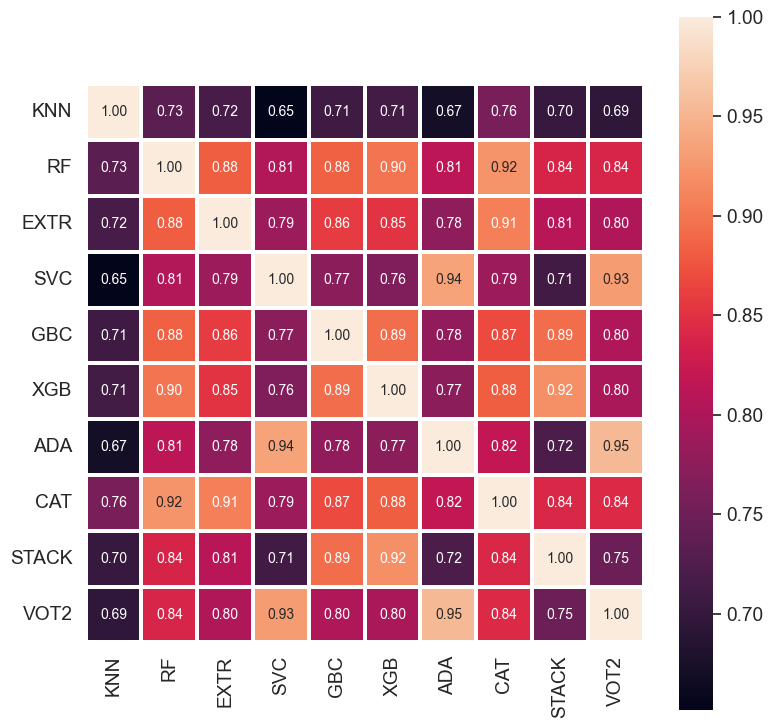

In [413]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
            )
plt.yticks(rotation=0)
plt.show()

Comparer l'importance des features

In [414]:
mp_rf   = pd.Series(data = rf_grid.best_estimator_.feature_importances_, index=X.columns)
imp_extr = pd.Series(data = extr_grid.best_estimator_.feature_importances_, index=X.columns)
imp_gbc = pd.Series(data = gbc_grid.best_estimator_.feature_importances_, index=X.columns)
imp_xgb = pd.Series(data = xgb_grid.best_estimator_.feature_importances_, index=X.columns)
imp_ada = pd.Series(data = ada_grid.best_estimator_.feature_importances_, index=X.columns)
imp_cat = pd.Series(data = cat_grid.best_estimator_.feature_importances_ / 100, index=X.columns)

In [415]:
models=['RF', 'EXTR', 'GBC', 'XGB', 'ADA', 'CAT']

fig = go.Figure(data=[
    go.Bar(name=models[0],  x=imp_rf.index,   y=imp_rf.values),
    go.Bar(name=models[1],  x=imp_extr.index, y=imp_extr.values),
    go.Bar(name=models[2],  x=imp_gbc.index,  y=imp_gbc.values),   
    go.Bar(name=models[3],  x=imp_xgb.index,  y=imp_xgb.values),    
    go.Bar(name=models[4],  x=imp_ada.index,  y=imp_ada.values),        
    go.Bar(name=models[5],  x=imp_cat.index,  y=imp_cat.values),  
])

fig.update_layout(barmode='group')
fig.update_layout(title=go.layout.Title(
                  text="Feature importances for Ensemble models",
                  xref="paper",
                  x=0.5))
fig.show()

# Conclusion

Dans ce 2eme notebook, j'ai étudié l'EDA avec Seaborn, y compris certains tracés inhabituels comme le violon et l'essaim.

Sur la base de l'EDA, j'ai comblé les valeurs manquantes en fonction des features associées et développé de nouvelles Feature Engineering afin d'améliorer les performances du modèle.

Dans la troisième partie de ce second notebook, j'ai appliqué des modèles d'ensemble pour la classification, tels que Boosting, Stacking et Voting.

Pour cela, nous avons utilisé des bibliothèques telles que : sklearn, mlxtend, catboost, xgboost.